# Decision Tree

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from telecom_churn_utilities import p_r_curve,evaluate_at_threshold

# Loading Dataset 

In [2]:
df =pd.read_csv('dataset/prepared_dataset.csv')
# This code is preparing the data for a machine learning model.
y = df['Churn'].values
X = df.drop(columns = ['Churn','Unnamed: 0'])

## Spliting Data into Train Test Split.

In [3]:
# The line of code is splitting the dataset `X` and `y` into training and testing sets. The training set is stored in `X_train` and `y_train`, while the testing set is stored in `X_test` and `y_test`. The `test_size` parameter specifies the proportion of the dataset that should be allocated for testing (in this case, 20% of the data). The `random_state` parameter is used to ensure reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Now find the best parameters for model by using Grid Search Cross Validation.

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Assuming you have features X_train and labels y_train

# Create a Decision Tree model
decision_tree = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(decision_tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)


Best parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
Best score: 0.8023886479240389


C:\Users\786\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
2880 fits failed out of a total of 11520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2880 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\786\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\786\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\786\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    validate

### Now we going to train our best_model on whole dataset.

In [5]:
best_decision_tree = DecisionTreeClassifier(**grid_search.best_params_)
best_decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                       min_samples_split=10)

### Evaluating the model

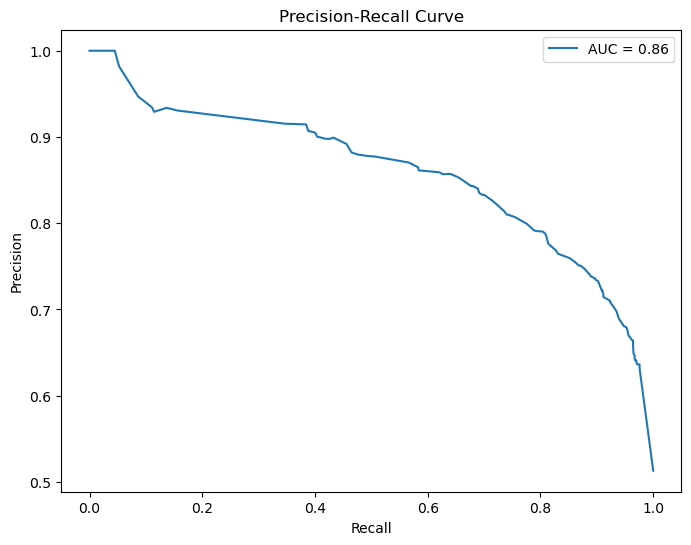

In [6]:
y_proba = best_decision_tree.predict_proba(X_test)[:, 1]
optimal_threshold = p_r_curve(y_test, y_proba)

Threshold: 0.35714285714285715


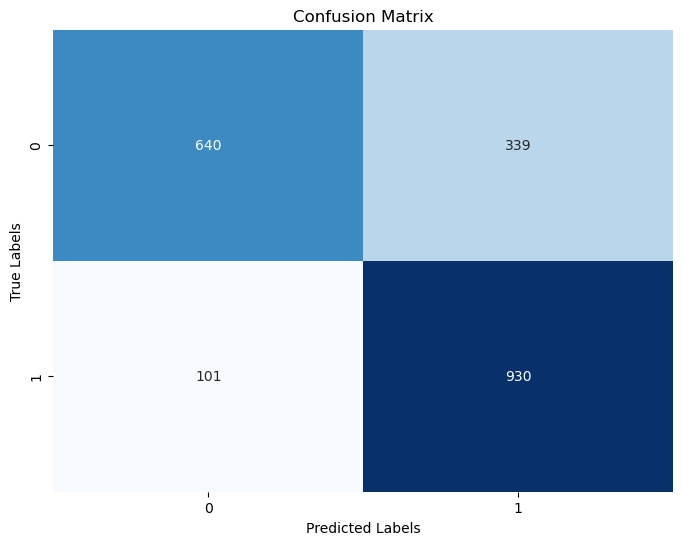

Accuracy: 0.7810945273631841
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.65      0.74       979
           1       0.73      0.90      0.81      1031

    accuracy                           0.78      2010
   macro avg       0.80      0.78      0.78      2010
weighted avg       0.80      0.78      0.78      2010

AUC-ROC Score:
0.7778825757988564




In [7]:
evaluate_at_threshold(y_test, y_proba, optimal_threshold)

# Saving Best Model

In [8]:
import joblib
# Save the model to a file
joblib.dump(best_decision_tree, 'Trained_Models/best_decision_tree.pkl')

['Trained_Models/best_decision_tree.pkl']